# Long-Run Growth

In this lecture, we will use the tools we have learned so far to download, organize, and visualize historical data on economic growth.

These _growth facts_ that we will see attracted a lot of interest from economists (and still do), especially from economists that want to understand how economies can grow, how they transition from a developing country to a developed country, how geopolitical forces affect economic growth, etc. 

Here is a graph showing the Gross Domestic Product (GDP) for different countries (we will see later how we can construct that graph ourselves):


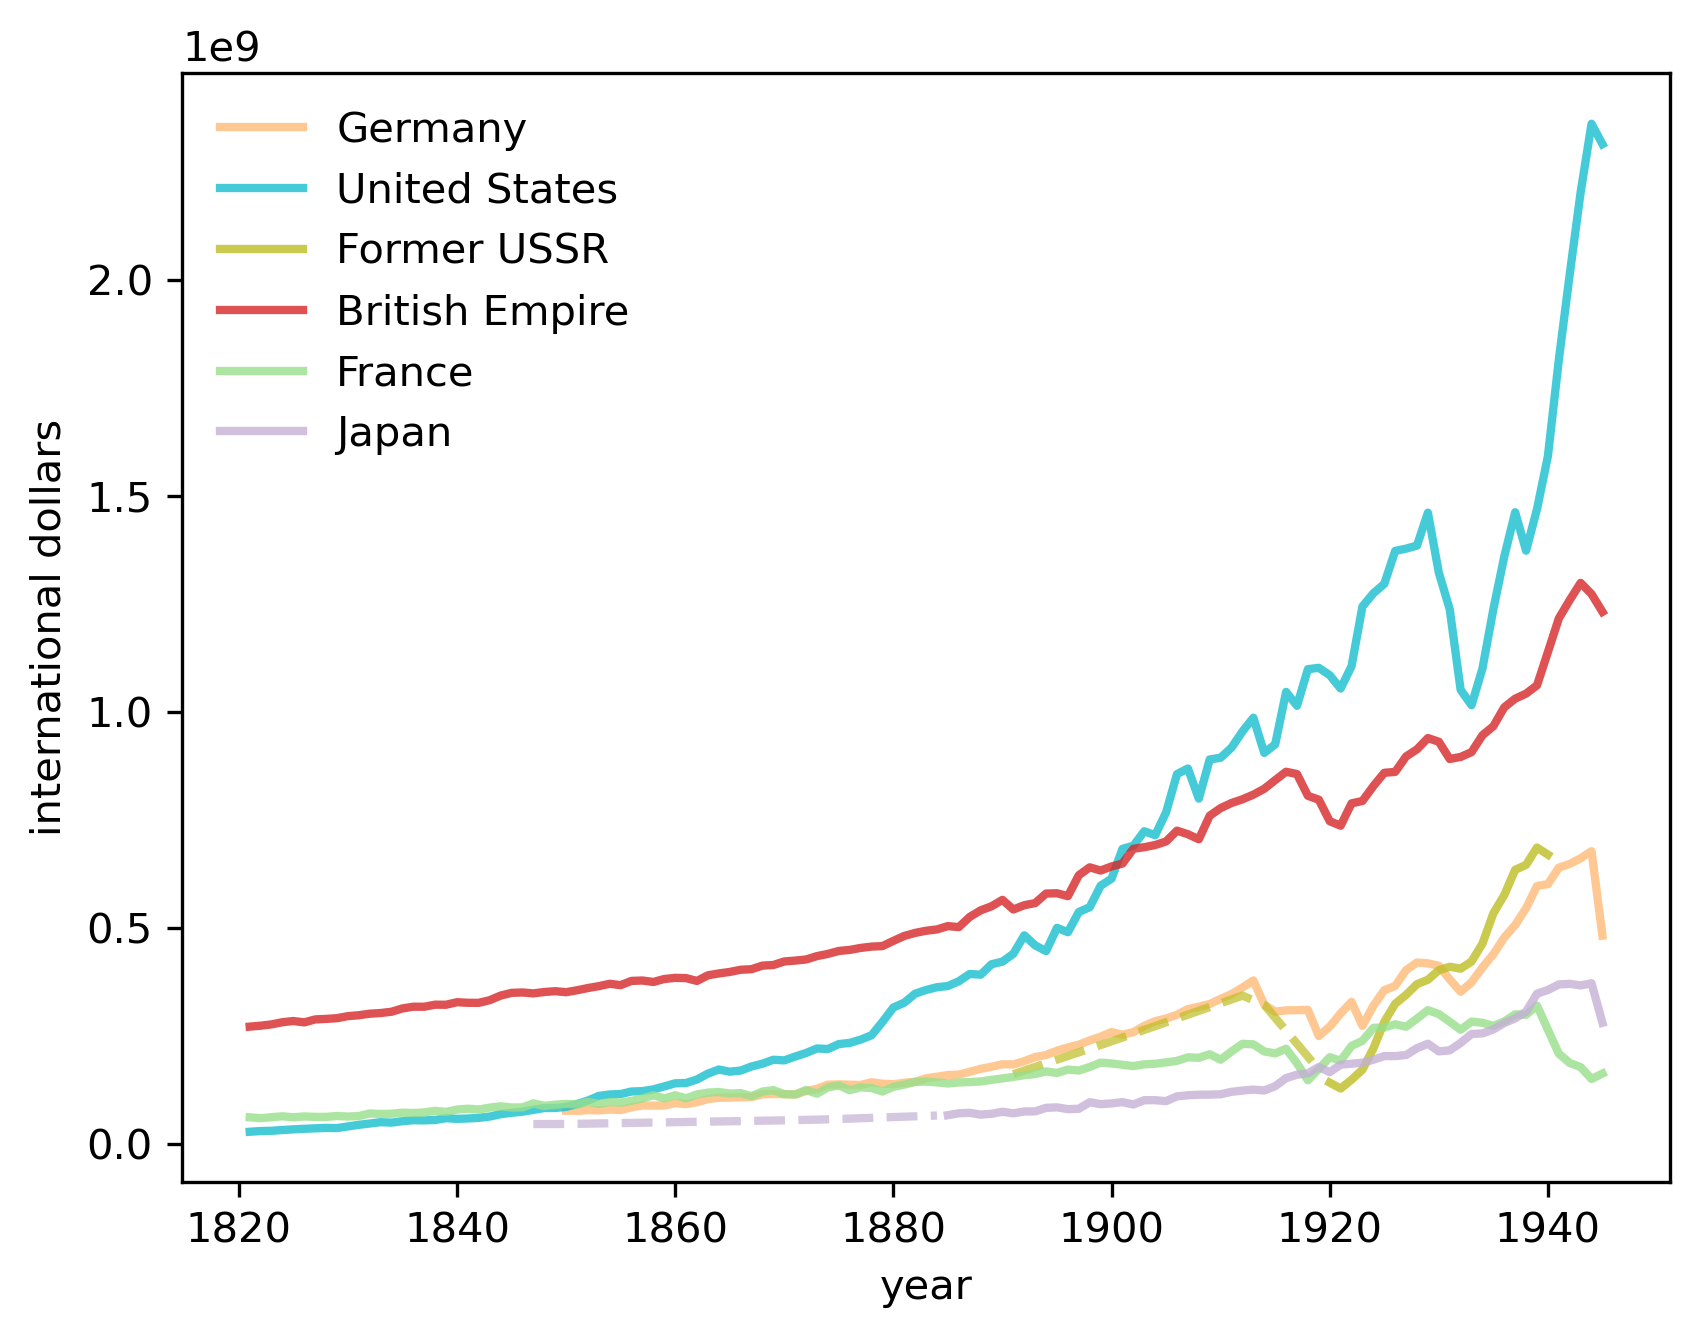


One thing we can see from that figure is how US GDP started the 19th century way behind the GDP of the British Empire.

By the end of the 19th century, US GDP had caught up with the British Empire, and during the first half of the 20th century, US GDP surpassed that of the British Empire.

Let's see how we can dig further into these historical episodes (as well as looking at more current periods) using Python.

We start by importing some packages. _Namedtuple_ are Python objects that are somewhere in between _classes_ and _dictionaries_ (more details on [cm](https://matplotlib.org/stable/api/cm_api.html) and [namedtuple](https://www.geeksforgeeks.org/namedtuple-in-python/)).

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import numpy as np
from collections import namedtuple

name tuples, work w colors, map countries to colors 

We will work with data collected by the Maddison Project, initiated by [Angus Maddison](https://en.wikipedia.org/wiki/Angus_Maddison).

The data can be downloaded [here](https://www.rug.nl/ggdc/historicaldevelopment/maddison/).

For today's lecture we are going to read the data from the QuantEcon GitHub repository:

In [80]:
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/mpd2020.xlsx"
data = pd.read_excel(data_url, 
                     sheet_name='Full data')
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


We can see that this dataset contains GDP per capita `gdppc` and population (in thousands) `pop` for many countries and years.

In [82]:
countries = data.country.unique() #unique country names 
len(countries)

169

We see that there are 169 different countries in that dataset. But we don't have the same number of observations for all of them:

In [84]:
data["country"].value_counts() #how many observations per country 

country
United Kingdom       769
Sweden               721
Italy                711
France               711
Netherlands          667
                    ... 
Equatorial Guinea     69
Croatia               69
Iceland               69
Kazakhstan            69
Zimbabwe              69
Name: count, Length: 169, dtype: int64

We can now explore some of these 169 countries in more detail.

To start, let's see which years we observe for the various countries:

In [86]:
country_years = []
for country in countries:
    cy_data = data[data.country == country]['year']
    ymin, ymax = cy_data.min(), cy_data.max()
    country_years.append((country, ymin, ymax))
    
country_years = pd.DataFrame(country_years,
                    columns=['country', 'min_year', 'max_year']).set_index('country')
country_years.head()

,min_year,max_year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018


Something seems weird about our data for Albania. Let's look at it more closely:

In [88]:
data[data['country'] == 'Albania'].head(10)

,countrycode,country,year,gdppc,pop
141,ALB,Albania,1,NaN,200.0
142,ALB,Albania,1000,NaN,200.0
143,ALB,Albania,1500,NaN,200.0
144,ALB,Albania,1600,NaN,200.0
145,ALB,Albania,1700,NaN,300.0
146,ALB,Albania,1820,NaN,437.0
147,ALB,Albania,1850,NaN,500.0
148,ALB,Albania,1870,711.0,603.0
149,ALB,Albania,1890,953.0,726.0
150,ALB,Albania,1900,1092.0,800.0


We see that Albania, for whatever reason, has some missing values. There are pop estimates but missing gdp values. We could either delete them or ignore them. They won't affect anything we're doing in the rest of this lecture.

Let us now reshape the original data into some convenient variables to enable quicker access to countries' time series data.

We can build a useful mapping between country codes and country names in the dataset:

In [91]:
code_to_name = data[
    ['countrycode', 'country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode']) #drop duplicates just need one observation for mapping, set index to country easier to reference

code_to_name

,country
countrycode,
AFG,Afghanistan
AGO,Angola
ALB,Albania
ARE,United Arab Emirates
ARG,Argentina
...,...
YEM,Yemen
YUG,Former Yugoslavia
ZAF,South Africa


This allows us to focus on GDP per capita and for this it is more convenient to work with a wide data format

In [93]:
gdp_pc = data.set_index(['countrycode', 'year'])['gdppc']
gdp_pc = gdp_pc.unstack('countrycode')
gdp_pc.tail() #guve last 5 observations 

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000
2017,2014.7453,8146.4354,10702.1201,76643.4984,19200.9061,10859.3783,49265.6135,42177.3706,16522.3072,671.3169,...,19918.1361,54007.7698,10743.8666,12879.1350,6422.0865,2321.9239,15960.8432,12189.3579,3497.5818,1582.3662
2018,1934.5550,7771.4418,11104.1665,76397.8181,18556.3831,11454.4251,49830.7993,42988.0709,16628.0553,651.3589,...,20185.8360,55334.7394,11220.3702,10709.9506,6814.1423,2284.8899,16558.3123,12165.7948,3534.0337,1611.4052


The following code creates a variable `color_mapping` mapping the country codes to colors.

In [95]:
country_names = data['countrycode']

# Generate a colormap with the number of colors matching the number of countries
colors = cm.tab20(np.linspace(0, 0.95, len(country_names))) #uses 20 colors , in order to fit every country split into 169 colors linspace equal space grid

# Create a dictionary to map each country to its corresponding color
color_mapping = {country: color for 
                 country, color in zip(country_names, colors)}

## GDP per capita

We are now going to look at GDP per capita over the long run for several different countries.

### United Kingdom

We start with the United Kingdom:

In [97]:
gdp_pc['GBR'].head(10)

year
1          NaN
730        NaN
1000    1151.0
1090       NaN
1120       NaN
1252    1320.0
1253    1328.0
1254    1317.0
1255    1285.0
1256    1255.0
Name: GBR, dtype: float64

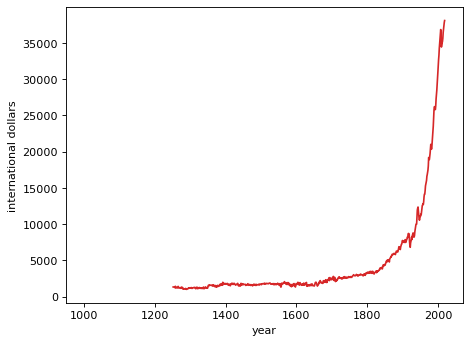

In [98]:
fig, ax = plt.subplots(dpi=80)
country = 'GBR'
gdp_pc[country].plot(
        ax=ax,
        ylabel='international dollars',
        xlabel='year',
        color=color_mapping[country]
    );



It says "International dollars" on the y-axis. [International dollars](https://en.wikipedia.org/wiki/International_dollar) are a hypothetical unit of currency that has the same purchasing power parity that the U.S. Dollar has in the United States at a given point in time. They are also known as Geary–Khamis dollars (GK Dollars).


We can see that the data is non-continuous for longer periods in the early 250 years of this millennium, so we could choose to interpolate to get a continuous line plot.

Here we use dashed lines to indicate interpolated trends:

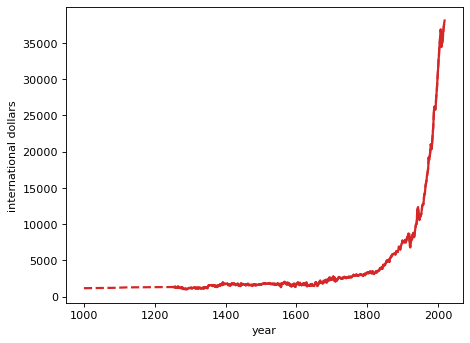

In [100]:
fig, ax = plt.subplots(dpi=80)
country = 'GBR'
ax.plot(gdp_pc[country].interpolate(),
        linestyle='--',
        lw=2,
        color=color_mapping[country]) #interpolating outside data 

ax.plot(gdp_pc[country],
        lw=2,
        color=color_mapping[country])
ax.set_ylabel('international dollars')
ax.set_xlabel('year')
plt.show()

### Comparing the UK with the US and China

Let's start by creating a function that generates plots for a list of countries:

In [102]:
def draw_interp_plots(series,        # pandas series
                      country,       # list of country codes
                      ylabel,        # label for y-axis
                      xlabel,        # label for x-axis
                      color_mapping, # code-color mapping
                      code_to_name,  # code-name mapping
                      lw,            # line width
                      logscale,      # log scale for y-axis
                      ax             # matplolib axis
                     ):

    for c in country:
        # Get the interpolated data
        df_interpolated = series[c].interpolate(limit_area='inside') # we do not extrapolate, only interpolate
        interpolated_data = df_interpolated[series[c].isnull()]

        # Plot the interpolated data with dashed lines
        ax.plot(interpolated_data,
                linestyle='--',
                lw=lw,
                alpha=0.7,
                color=color_mapping[c]) #use color mapping with 169 colors , reference with c (the country) 

        # Plot the non-interpolated data with solid lines
        ax.plot(series[c],
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]['country'])
        
        if logscale:
            ax.set_yscale('log')
    
    # Draw the legend outside the plot
    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

For the UK, we saw before that economic growth started in the 18th century and continued for the next two hundred years.

How does this compare with other countries' trajectories?

Let's look at the US, the UK, and China:

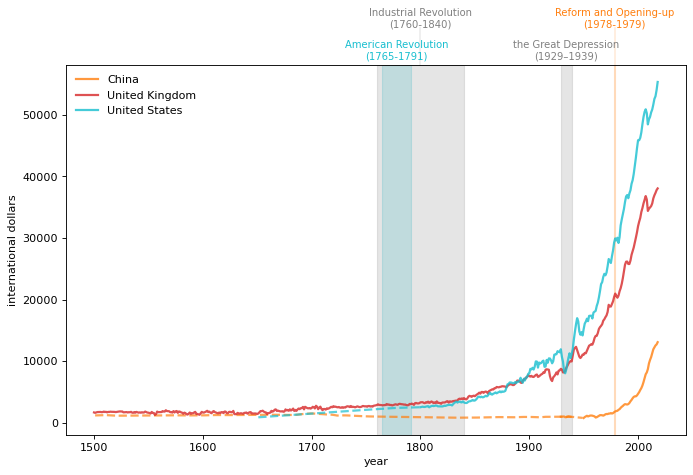

In [104]:
# Define the namedtuple for the events
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=80, figsize=(10, 6))

country = ['CHN', 'GBR', 'USA'] #set to china, great britain and us 
draw_interp_plots(gdp_pc[country].loc[1500:], #start in 1500 year 
                  country,
                  'international dollars','year', #labels
                  color_mapping, code_to_name, 2, False, ax) 

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# Create a list of events to annotate
events = [
    Event((1765, 1791), ylim + ylim*0.04, #range, y text so above y axis limit with 0.04
          'American Revolution\n(1765-1791)', #text
          color_mapping['USA'], 1), # use us color bc us specific 
    Event((1760, 1840), ylim + ylim*0.13, #moves further up with .13, non overlapping
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.1), #grey bc global event 
    Event((1929, 1939), ylim + ylim*0.04, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1),
    Event((1978, 1979), ylim + ylim*0.13, 
          'Reform and Opening-up\n(1978-1979)', 
          color_mapping['CHN'], 1.1) #china color map bc china specific event 
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2) #vertical span of figure , alpha 0.2 makes transparaent 
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color, #line to map name text to shaded region 
                   clip_on=False, alpha=0.15)

# Draw events
draw_events(events, ax)
plt.show()

The preceding graph of per capita GDP strikingly reveals how the spread of the Industrial Revolution has over time gradually lifted the living standards of substantial groups of people

- most of the growth happened in the past 150 years after the Industrial Revolution.
- per capita GDP in the US and UK rose and diverged from that of China from 1820 to 1940.
- the gap has closed rapidly after 1950 and especially after the late 1970s.
- these outcomes reflect complicated combinations of technological and economic-policy factors that economists try to understand and quantify.

### Focusing on China



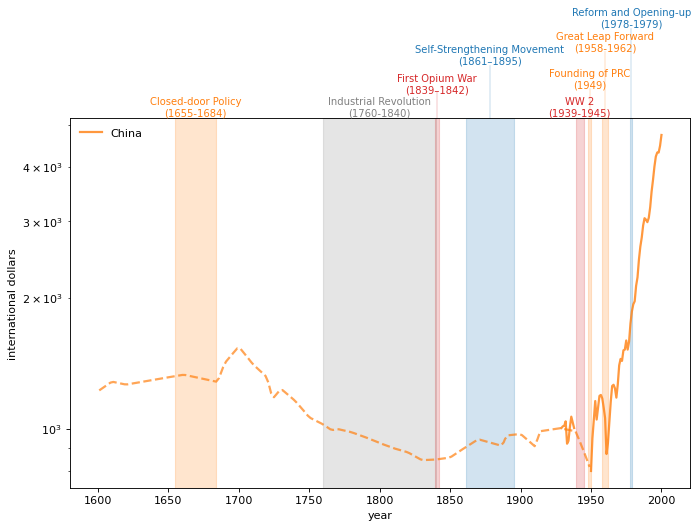

In [107]:
fig, ax = plt.subplots(dpi=80, figsize=(10, 6))

country = ['CHN']
draw_interp_plots(gdp_pc[country].loc[1600:2000], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

events = [
Event((1655, 1684), ylim + ylim*0.06, 
      'Closed-door Policy\n(1655-1684)', 
      'tab:orange', 1),
Event((1760, 1840), ylim + ylim*0.06, 
      'Industrial Revolution\n(1760-1840)', 
      'grey', 1),
Event((1839, 1842), ylim + ylim*0.2, 
      'First Opium War\n(1839–1842)', 
      'tab:red', 1.07),
Event((1861, 1895), ylim + ylim*0.4, 
      'Self-Strengthening Movement\n(1861–1895)', 
      'tab:blue', 1.14),
Event((1939, 1945), ylim + ylim*0.06, 
      'WW 2\n(1939-1945)', 
      'tab:red', 1),
Event((1948, 1950), ylim + ylim*0.23, 
      'Founding of PRC\n(1949)', 
      color_mapping['CHN'], 1.08),
Event((1958, 1962), ylim + ylim*0.5, 
      'Great Leap Forward\n(1958-1962)', 
      'tab:orange', 1.18),
Event((1978, 1979), ylim + ylim*0.7, 
      'Reform and Opening-up\n(1978-1979)', 
      'tab:blue', 1.24)
]

# Draw events
draw_events(events, ax)
plt.show()

It is fascinating to see China’s GDP per capita levels from 1500 through to the 1970s.

Notice the long period of declining GDP per capital levels from the 1700s until the early 20th century.

Thus, the graph indicates

- a long economic downturn and stagnation after the Closed-door Policy by the Qing government.
- China’s very different experience than the UK’s after the onset of the industrial revolution in the UK.
- how the Self-Strengthening Movement seemed mostly to help China to grow.
- how stunning have been the growth achievements of modern Chinese economic policies by the PRC that culminated with its late 1970s reform and liberalization.

### Focusing on the US and UK

Now, let's focus on the USA and the United Kingdom (GBR).

In the following graph, pay close attention to:

- impact of trade policy (Navigation Act).
- productivity changes brought by the Industrial Revolution.
- how the US gradually approaches and then surpasses the UK, setting the stage for the ‘‘American Century’’.
- the often unanticipated consequences of wars.
- interruptions and scars left by business cycle recessions and depressions.

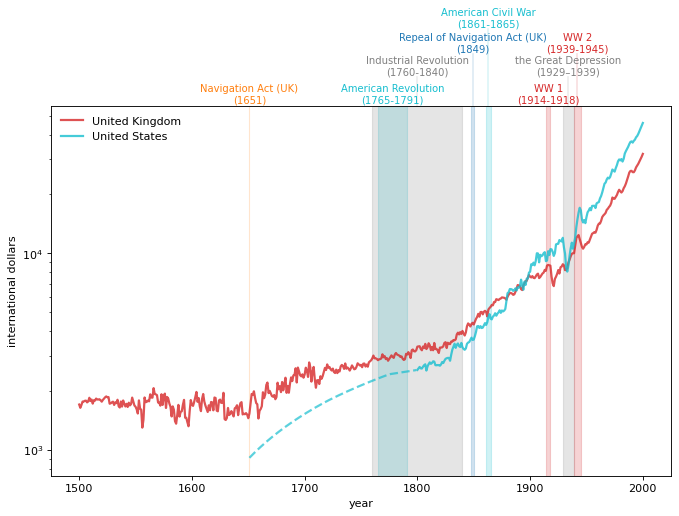

In [110]:
fig, ax = plt.subplots(dpi=80, figsize=(10, 6))

country = ['GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:2000],
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

# Create a list of data points
events = [
    Event((1651, 1651), ylim + ylim*0.15, 
          'Navigation Act (UK)\n(1651)', 
          'tab:orange', 1),
    Event((1765, 1791), ylim + ylim*0.15, 
          'American Revolution\n(1765-1791)',
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.6, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.08),
    Event((1848, 1850), ylim + ylim*1.1, 
          'Repeal of Navigation Act (UK)\n(1849)', 
          'tab:blue', 1.14),
    Event((1861, 1865), ylim + ylim*1.8, 
          'American Civil War\n(1861-1865)', 
          color_mapping['USA'], 1.21),
    Event((1914, 1918), ylim + ylim*0.15, 
          'WW 1\n(1914-1918)', 
          'tab:red', 1),
    Event((1929, 1939), ylim + ylim*0.6, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1.08),
    Event((1939, 1945), ylim + ylim*1.1, 
          'WW 2\n(1939-1945)', 
          'tab:red', 1.14)
]

# Draw events
draw_events(events, ax)
plt.show()

## GDP Growth

We are now going to focus on total GDP (which is among economic historians often used as a proxy for "national geopolitical-military power") rather than on GDP per capita (which is a better proxy for living standards).

In [115]:
data = pd.read_excel(data_url, sheet_name='Full data')
data.set_index(['countrycode', 'year'], inplace=True)
data['gdp'] = data['gdppc'] * data['pop']
data.tail()

country      gdppc          pop           gdp
countrycode year                                                
ZWE         2014  Zimbabwe  1594.0000  13313.99205  2.122250e+07
            2015  Zimbabwe  1560.0000  13479.13812  2.102746e+07
            2016  Zimbabwe  1534.0000  13664.79457  2.096179e+07
            2017  Zimbabwe  1582.3662  13870.26413  2.194784e+07
            2018  Zimbabwe  1611.4052  14096.61179  2.271535e+07

In [116]:
gdp = data['gdp'].unstack('countrycode')
gdp.tail()

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2014,6.434611e+07,1.701933e+08,2.967564e+07,6.681600e+08,8.259815e+08,2.850714e+07,1.117472e+09,3.553646e+08,1.622161e+08,7.764240e+06,...,6.437485e+07,1.648266e+10,2.628246e+08,5.983983e+08,5.098025e+08,1.110009e+08,3.210041e+08,6.484552e+08,5.341918e+07,2.122250e+07
2015,6.278339e+07,1.768487e+08,3.044453e+07,6.915385e+08,8.478549e+08,2.936531e+07,1.145387e+09,3.589881e+08,1.639971e+08,7.340438e+06,...,6.483013e+07,1.690258e+10,2.838214e+08,5.589242e+08,5.439312e+08,7.990404e+07,3.275954e+08,6.568503e+08,5.498018e+07,2.102746e+07
2016,6.429743e+07,1.783339e+08,3.148182e+07,7.094261e+08,8.283730e+08,2.942693e+07,1.176481e+09,3.642183e+08,1.578124e+08,7.129465e+06,...,6.576380e+07,1.716256e+10,3.059634e+08,4.564771e+08,5.776835e+08,7.218882e+07,3.363309e+08,6.586943e+08,5.661833e+07,2.096179e+07
2017,6.875280e+07,1.780664e+08,3.267876e+07,7.262647e+08,8.504822e+08,3.163925e+07,1.205343e+09,3.732380e+08,1.580554e+08,7.354277e+06,...,6.746774e+07,1.759628e+10,3.196155e+08,3.849426e+08,6.177747e+08,6.852740e+07,3.428671e+08,6.680149e+08,5.861356e+07,2.194784e+07
2018,6.759497e+07,1.759296e+08,3.400911e+07,7.349062e+08,8.293733e+08,3.329652e+07,1.238560e+09,3.822694e+08,1.604262e+08,7.314109e+06,...,6.856071e+07,1.814065e+10,3.368748e+08,3.094130e+08,6.614884e+08,6.904273e+07,3.547381e+08,6.732721e+08,6.097862e+07,2.271535e+07


### Early industrialization (1820 to 1940)

We first visualize the trend of China, the Former Soviet Union, Japan, the UK and the US.

The most notable trend is the rise of the US, surpassing the UK in the 1860s and China in the 1880s.

The growth continued until the large dip in the 1930s when the Great Depression hit.

Meanwhile, Russia experienced significant setbacks during World War I and recovered significantly after the February Revolution in 1917.

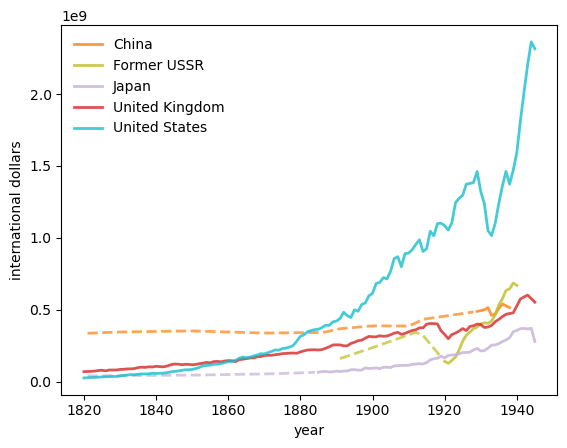

In [123]:
fig, ax = plt.subplots(dpi=100)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1820, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)
#absolute size 

Let us first define a collection of countries that consist of the British Empire (BEM) so we can replicate that series from the chart in the beginning.

In [128]:
BEM = ['GBR', 'IND', 'AUS', 'NZL', 'CAN', 'ZAF']
# Interpolate incomplete time-series
gdp['BEM'] = gdp[BEM].loc[start_year-1:end_year].interpolate(method='index').sum(axis=1)

Now let's assemble our series and get ready to plot them.

In [134]:
# Define colour mapping and name for BEM
color_mapping['BEM'] = color_mapping['GBR']  # Set the color to be the same as Great Britain
# Add British Empire to code_to_name
bem = pd.DataFrame(["British Empire"], index=["BEM"], columns=['country'])
bem.index.name = 'countrycode'
code_to_name = pd.concat([code_to_name, bem])

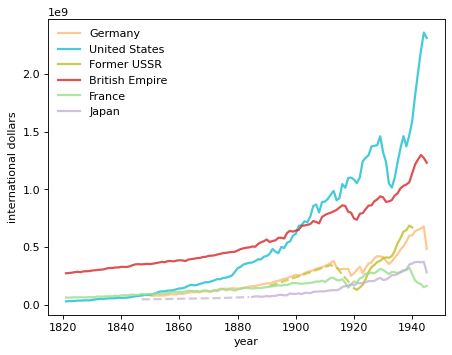

In [140]:
fig, ax = plt.subplots(dpi=80)
country = ['DEU', 'USA', 'SUN', 'BEM', 'FRA', 'JPN']
start_year, end_year = (1821, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)


plt.show()

At the start of this lecture, we noted how US GDP came from “nowhere” at the start of the 19th century to rival and then overtake the GDP of the British Empire by the end of the 19th century, setting the geopolitical stage for the “American (twentieth) century”.

Let’s move forward in time and start roughly where the graph stopped after World War II.

This will provide some information about geopolitical realities today.

### The modern era (1950 to 2020)

The following graph shows how quickly China has grown, especially since the late 1970s.

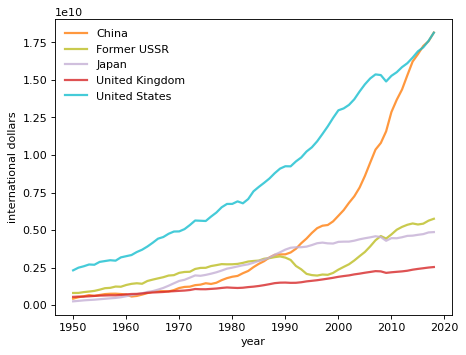

In [144]:
fig, ax = plt.subplots(dpi=80)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1950, 2020)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

## Regional Analysis

We often also want to study the historical experiences of countries outside the club of "World Powers".

The Maddison project dataset also provides regional aggregations:

In [147]:
data = pd.read_excel(data_url, 
                     sheet_name='Regional data', 
                     header=(0,1,2),
                     index_col=0)
data.columns = data.columns.droplevel(level=2)

We can save the raw data in a more convenient format to build a single table of regional GDP per capita

In [150]:
regionalgdp_pc = data['gdppc_2011'].copy()
regionalgdp_pc.index = pd.to_datetime(regionalgdp_pc.index, format='%Y')

Let’s interpolate based on time to fill in any gaps in the dataset for the purpose of plotting.

In [153]:
regionalgdp_pc.interpolate(method='time', inplace=True)

Looking more closely, let’s compare the time series for `Western Offshoots` and `Sub-Saharan Africa` with a number of different regions around the world.

Again we see the divergence of the West from the rest of the world after the Industrial Revolution and the convergence of the world after the 1950s

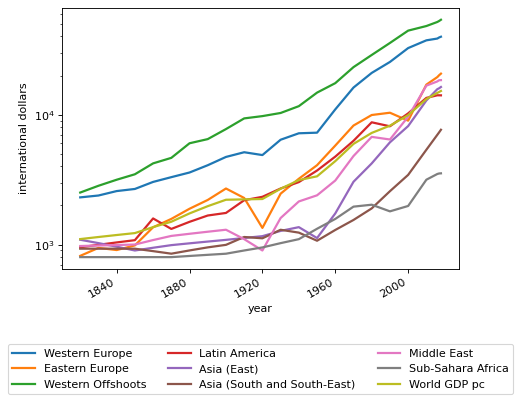

In [156]:
fig, ax = plt.subplots(dpi=80)
regionalgdp_pc.plot(ax=ax, xlabel='year',
                    lw=2,
                    ylabel='international dollars')
ax.set_yscale('log')
plt.legend(loc='lower center',
           ncol=3, bbox_to_anchor=[0.5, -0.5])
plt.show()

In [159]:
#check solutions on canvas 